**INTRODUCTION**  

In this project, the objective was to predict the risk of early-stage diabetes using a dataset specifically curated for this purpose. Initially, my efforts were directed towards cleaning the data, a fundamental step where I identified and rectified any duplicates or missing values.

Age was categorized into distinct groups to better understand its influence on diabetes risk, acknowledging that age is a significant factor in health risk assessment. Furthermore, I conducted a thorough examination of categorical variables to determine their correlation with diabetes risk.

For visualization, pie charts were employed to represent the distribution of responses clearly. Special attention was given to ensure that positive responses, such as 'Yes' and 'Positive', were consistently highlighted for easy identification.

The preprocessing phase involved One-Hot Encoding to handle categorical variables and scaling to normalize the data, preparing it for effective model training. I evaluated a variety of models, including Logistic Regression and RandomForestClassifier, to identify the most accurate predictor of diabetes risk.

The RandomForestClassifier emerged as the most effective model, demonstrating superior performance on both the training set and the test set. It was notably proficient in correctly identifying individuals without diabetes (achieving high recall) and in accurately detecting patients with diabetes (achieving high precision) in the test set.

To gain deeper insights into the model's performance, I analyzed the classification reports and confusion matrices for both the training and test sets. This allowed me to assess the model's effectiveness across different classes meticulously. Additionally, I explored the feature importance to pinpoint the variables most impactful in predicting diabetes risk.

# Libraries

In [1]:
%%capture
!pip install catboost
!pip install pingouin

In [2]:
# Data manipulation
#====================
import os
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Data visualization
#====================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches

# Stats
#===================
import pingouin as pg

# Data preprocessing
#===================
import re
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Models
#====================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#===================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Progress monitoring
#===================
from tqdm.auto import tqdm

# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
path = '/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv'
df = pd.read_csv(path)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
target = 'class'

# Exploratory Data Analysis

In [5]:
print("#" * 50)
print(" " * 15, "Dataset Information")
print("#" * 50)
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
print(df.info())

##################################################
                Dataset Information
##################################################
The Dataset has 17 columns and 520 rows.
The DataFrame has 269 duplicated values and 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 n

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Labelling
bins = [15, 30, 45, 60, float('inf')]
labels = ['15-30', '31-45', '46-60', '61+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,31-45
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,46-60
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,31-45
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,31-45
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,46-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,31-45
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive,46-60
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,46-60
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,31-45


In [8]:
# Exploring Categorical Columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Create a DataFrame from categorical columns with their unique values
cat_feature_info = pd.DataFrame(columns=['Feature', 'Unique_Values'])
for cat_feat in categorical_columns:
    unique_values = df[cat_feat].unique()
    cat_feature_info = pd.concat([cat_feature_info, pd.DataFrame({'Feature': cat_feat, 'Unique_Values': [unique_values]})], ignore_index=True)

display(cat_feature_info)

,Feature,Unique_Values
0,Gender,"[Male, Female]"
1,Polyuria,"[No, Yes]"
2,Polydipsia,"[Yes, No]"
3,sudden weight loss,"[No, Yes]"
4,weakness,"[Yes, No]"
5,Polyphagia,"[No, Yes]"
6,Genital thrush,"[No, Yes]"
7,visual blurring,"[No, Yes]"
8,Itching,"[Yes, No]"
9,Irritability,"[No, Yes]"


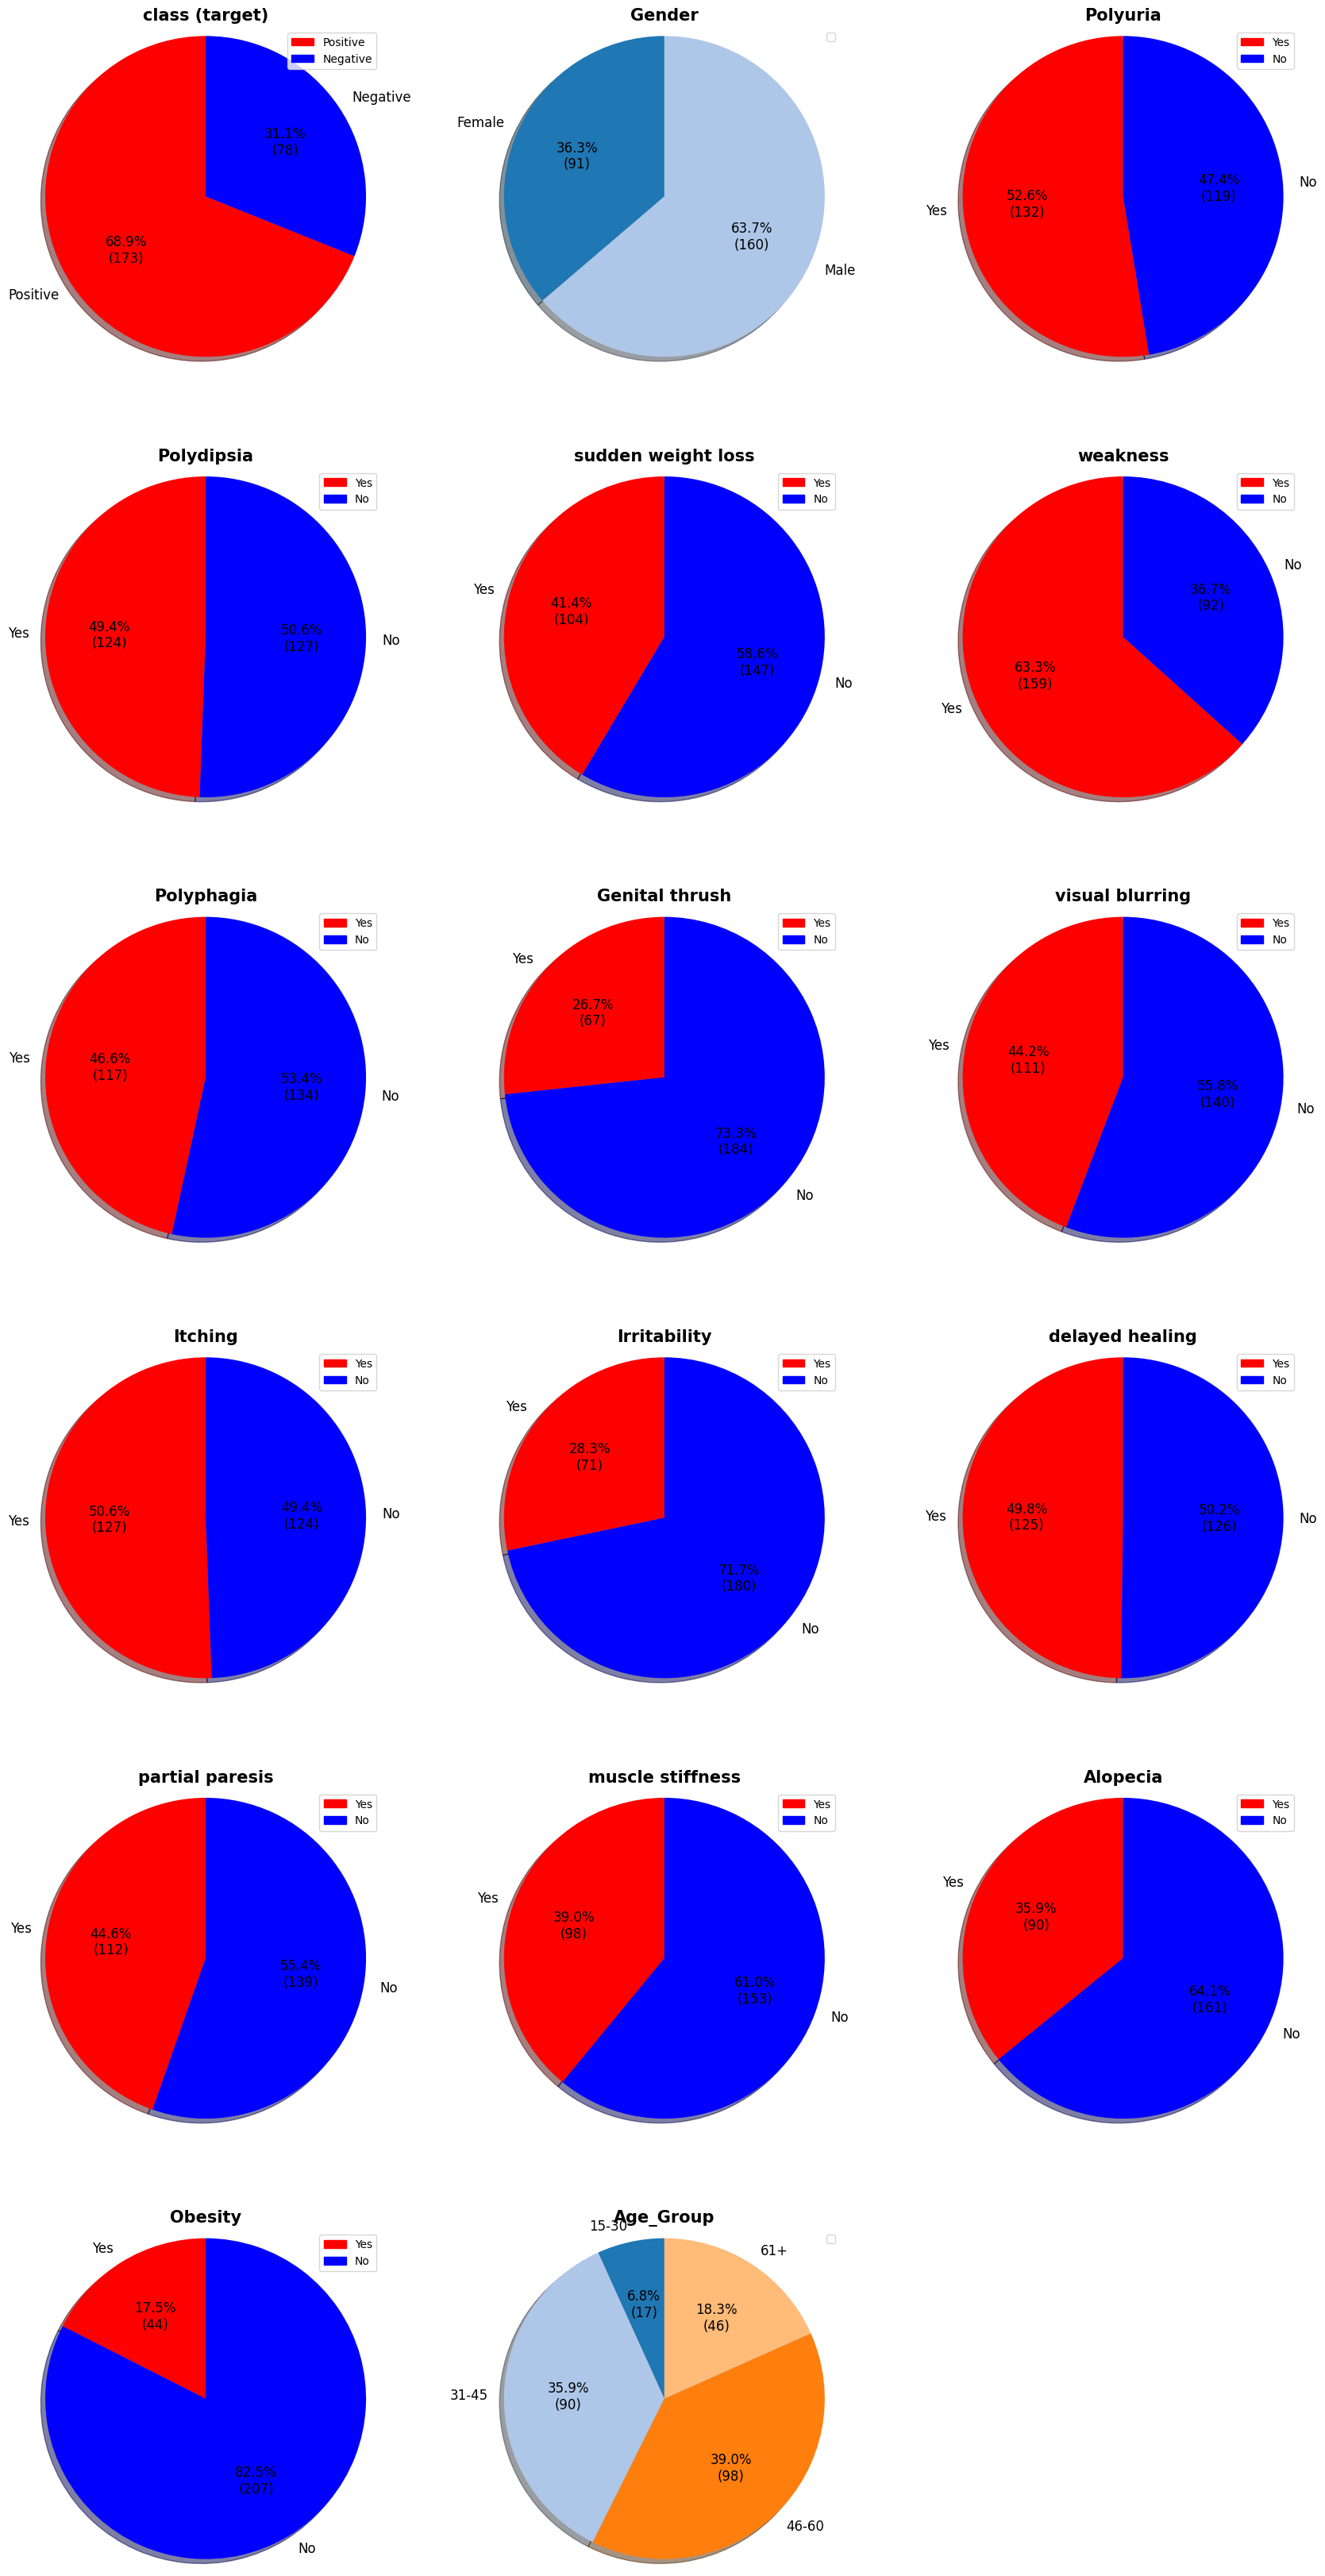

In [9]:
# Visualizing Categorical Columns (Pie Chart)

# Select only the categorical features as list. We know need features, hence we use columns.tolist()
categorical_features = categorical_columns.columns.tolist()

if target in categorical_features:  # Remainder: target has been defined as 'class' before
    categorical_features.insert(0, categorical_features.pop(categorical_features.index(target)))

# Colormap
yes_color = 'red'
no_color = 'blue'
other_colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Create figure and axes for the subplots
fig, ax = plt.subplots(nrows=(len(categorical_features) // 3) + 1, ncols=3, figsize=(20, 40))
ax = ax.flatten()

# Define the autopct function for pie charts
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

for i, cat_feat in enumerate(categorical_features):
    # Count values for each category
    df_class = df[cat_feat].value_counts().sort_index()
    labels = df_class.index.tolist()
    values = df_class.values.tolist()

    # Sorting labels to ensure 'Yes', 'Positive' are always on top
    sorted_labels = sorted(labels, key=lambda x: ('Yes', 'Positive', 'No', 'Negative').index(x) if x in ('Yes', 'Positive', 'No', 'Negative') else 999)
    sorted_values = [df_class[label] for label in sorted_labels]

    # Assign colors based on sorted labels
    colors = []
    legend_elements = []
    for label in sorted_labels:
        if label in ['Yes', 'Positive']:
            colors.append(yes_color)
            legend_elements.append(patches.Patch(color=yes_color, label=label))
        elif label in ['No', 'Negative']:
            colors.append(no_color)
            legend_elements.append(patches.Patch(color=no_color, label=label))
        else:
            color = other_colors[len(colors) % len(other_colors)]
            colors.append(color)

    # Draw the pie chart
    ax[i].pie(sorted_values, labels=sorted_labels, autopct=autopct_fun(sorted_values), shadow=True, startangle=90,
              colors=colors, textprops={'fontsize': 12})
    ax[i].set_title(f"{cat_feat}{' (target)' if cat_feat == target else ''}", fontsize=15, fontweight="bold")
    ax[i].axis('equal')

    # Add the legend
    ax[i].legend(handles=legend_elements, loc='best')

# Hide unused axes
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.3)
plt.show()


In [10]:
# Categorical Dependency Analyze

def analyze_categorical_dependency(df, target, p_value_threshold=0.05, power_threshold=0.7):
    # Store the results in an empty list
    results = []
    categorical_features = df.select_dtypes(include=['category', 'object']).columns
    # Perform chi-square test for each categorical feature
    for feature in categorical_features:
        # Compare with target value, but don't compare with itself
        if feature != target:
            # Apply chi-square independence test
            chi2_result = pg.chi2_independence(data=df, x=feature, y=target)
            stats = chi2_result[2]
            
            # Get p-value and power values
            p_value = stats['pval'].iloc[0]
            power = stats['power'].iloc[0]

            # Check for NaN
            p_value = 1 if pd.isnull(p_value) else p_value
            power = 0 if pd.isnull(power) else power

            # Check dependency and power status
            dependency = 'Yes' if p_value < p_value_threshold else 'No'
            reliable = 'Yes' if power > power_threshold else 'No'

            # Append the results
            results.append({
                'Feature': feature,
                'p-value': p_value,
                'power': power,
                'dependency': dependency,
                'reliable': reliable
            })

    # Return the results as a DataFrame
    return pd.DataFrame(results)

results_df = analyze_categorical_dependency(df, target) # Remainder(again), target has been defined as 'class' for this dataset
results_df

,Feature,p-value,power,dependency,reliable
0,Gender,1.934283e-06,0.997447,Yes,Yes
1,Polyuria,2.962616e-22,1.000000,Yes,Yes
2,Polydipsia,1.631128e-20,1.000000,Yes,Yes
3,sudden weight loss,8.217541e-09,0.999929,Yes,Yes
4,weakness,2.515933e-02,0.609885,Yes,No
5,Polyphagia,1.047539e-06,0.998264,Yes,Yes
6,Genital thrush,4.056787e-03,0.819576,Yes,Yes
7,visual blurring,2.535623e-03,0.855222,Yes,Yes
8,Itching,7.779226e-01,0.059161,No,No
9,Irritability,4.003440e-05,0.984116,Yes,Yes


In [11]:
labels = df[target].unique()

# Sort labels alphabetically
labels.sort()

# Create a dictionary
label_dict = {label: i for i, label in enumerate(labels)}

print(label_dict)

{'Negative': 0, 'Positive': 1}


In [12]:
df['class'] = df['class'].map(label_dict)

# Data Pre-processing

In [13]:
X = df.drop([target, 'Age'], axis=1)
y = df['class']

SEED = 42

X_train, X_test, y_train, y_test = tts(X, 
                                       y, 
                                       test_size = 0.2, 
                                       random_state = SEED,
                                       stratify=y)

In [14]:
reverse_label_dict = {v: k for k, v in label_dict.items()}
y_train_named = y_train.map(reverse_label_dict)
y_test_named = y_test.map(reverse_label_dict)

# Count the label distributions for training and test sets
train_label_distribution = y_train_named.value_counts()
test_label_distribution = y_test_named.value_counts()

# Merge training and test label distributions into a single DataFrame
label_distribution = pd.concat([train_label_distribution, test_label_distribution], axis=1, keys=['Count (Training)', 'Count (Test)'])

# Show the label distributions for training and test sets
print("Label Distribution in Training and Test Sets:")
display(label_distribution)

Label Distribution in Training and Test Sets:


,Count (Training),Count (Test)
class,,
Positive,138,35
Negative,62,16


In [15]:
# One-Hot-Encoding
categorical_features = df.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([('ohe', OneHotEncoder(drop = 'first', 
                                                        sparse_output = False, 
                                                        handle_unknown = "ignore"), 
                                   categorical_features)], 
                                 remainder = 'passthrough', 
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [16]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prep)
X_test_scaled = scaler.transform(X_test_prep)

# Finding The Most Effective ML Model

In [17]:
# Logistic Regression
lr = LogisticRegression(random_state=SEED, multi_class='multinomial', max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_test):.4f}")

Accuracy Train: 0.9350
Accuracy Test: 0.7843


In [18]:
# ML models
clf1 = RandomForestClassifier(random_state = SEED, n_jobs = -1)
clf2 = ExtraTreesClassifier(bootstrap = True, n_jobs = -1, random_state = SEED)
clf3 = XGBClassifier(random_state = SEED)
clf4 = LGBMClassifier(random_state = SEED, n_jobs = -1)
clf5 = CatBoostClassifier(random_state = SEED, verbose = 0)

models_list = [clf1, clf2, clf3, clf4, clf5]

In [19]:
accuracy_train = {}
accuracy_test = {}

for model in tqdm(models_list):
    name = type(model).__name__
    model.fit(X_train_prep, y_train)
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)
    accuracy_train[name] = accuracy_score(y_train, y_pred_train)
    accuracy_test[name] = accuracy_score(y_test, y_pred_test)
    print(f'* {name} finished.')

  0%|          | 0/5 [00:00<?, ?it/s]

* RandomForestClassifier finished.
* ExtraTreesClassifier finished.
* XGBClassifier finished.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 138, number of negative: 62
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.690000 -> initscore=0.800119
[LightGBM] [Info] Start training from score 0.800119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

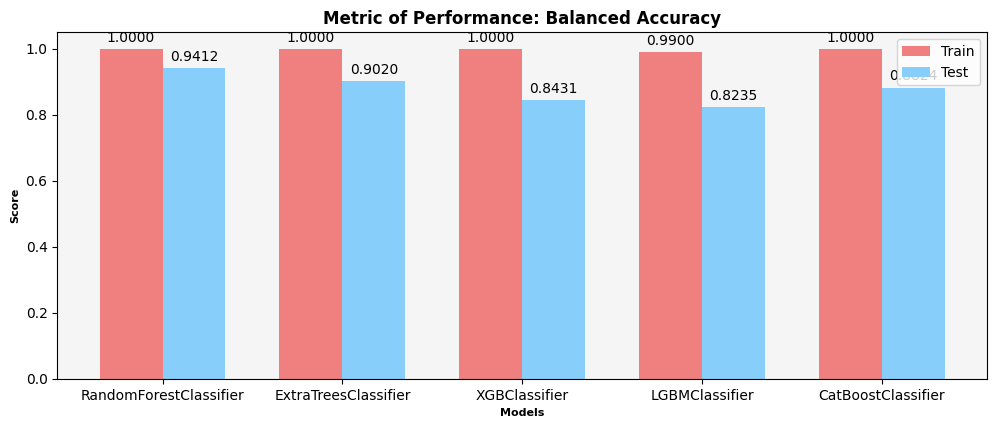

In [20]:
# Create DataFrame from dictionary for train and test metrics
metric_train = pd.DataFrame.from_dict(accuracy_train, orient='index')
metric_train = metric_train.rename(columns={0: 'Train'})
metric_test = pd.DataFrame.from_dict(accuracy_test, orient='index')
metric_test = metric_test.rename(columns={0: 'Test'})

# Create subplots
fig, ax = plt.subplots(figsize=(12, 4.5))

# Get labels, train and test values
labels = metric_train.index.to_list()
values_train = metric_train.iloc[:, 0].to_list()
values_test = metric_test.iloc[:, 0].to_list()
x = np.arange(len(labels))
width = 0.35

# Plot bars for train and test metrics
rects1 = ax.bar(x=x - width / 2, height=values_train, width=width, label='Train', color='lightcoral')
rects2 = ax.bar(x=x + width / 2, height=values_test, width=width, label='Test', color='lightskyblue')

# Function to label bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text=f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center",
                    va="bottom")

# Call autolabel function for train and test bars
autolabel(rects1)
autolabel(rects2)

# Add legend, title, and axis labels
ax.legend()
ax.set_title("Metric of Performance: Balanced Accuracy", fontsize=12, fontweight="bold", color="black")
ax.set_ylabel("Score", fontsize=8, fontweight="bold", color="black")
ax.set_xlabel("Models", fontsize=8, fontweight="bold", color="black")
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set background color of the plot
ax.set_facecolor('whitesmoke')

# Show the plot
plt.show()

# Evaulation for the ML Model with The Best Performance

In [21]:
#Predictions
best_classifier = clf1 # Random Forest Classifier wins

y_pred_train_final = best_classifier.predict(X_train_prep)
y_pred_test_final = best_classifier.predict(X_test_prep)

In [22]:
# Classification Report 

print("##" * 30)
print(" " * 12, "Classification Report Train")
print("##" * 30)
print(classification_report(y_train, y_pred_train_final))
print("")

print("##" * 30)
print(" " * 12, "Classification Report Test")
print("##" * 30)
print(classification_report(y_test, y_pred_test_final))

############################################################
             Classification Report Train
############################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


############################################################
             Classification Report Test
############################################################
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.91      0.96        35

    accuracy                           0.94        51
   macro avg       0.92      0.96      0.93        51
weighted avg       0.95      0.94      0.94        51



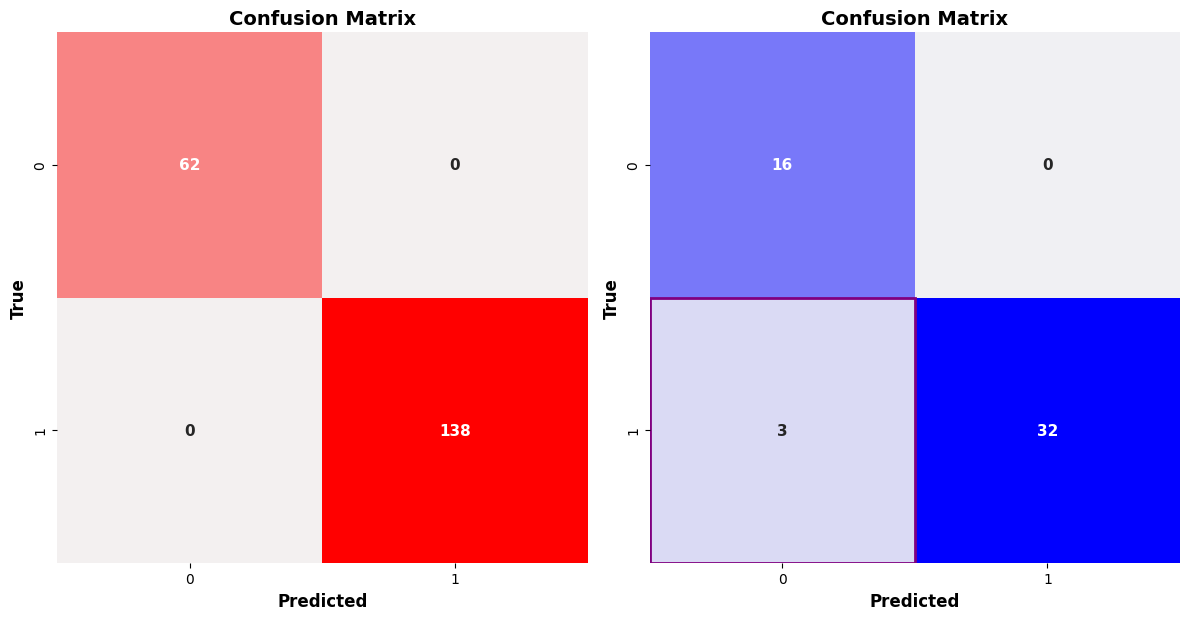

In [23]:
# Confusion Matrices

# Calculate the Confusion Matrices
cf_mx_train = confusion_matrix(y_train, y_pred_train_final)
cf_mx_test = confusion_matrix(y_test, y_pred_test_final)

# Define the color palettes
palette_train = sns.light_palette("red", as_cmap=True)
palette_test = sns.light_palette("blue", as_cmap=True)

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Create heatmaps
sns.heatmap(cf_mx_train, cmap=palette_train, annot=True, annot_kws={'fontsize': 11, 'fontweight': 'bold'}, fmt='', cbar=False, square=True, ax=axs[0])
sns.heatmap(cf_mx_test, cmap=palette_test, annot=True, annot_kws={'fontsize': 11, 'fontweight': 'bold'}, fmt='', cbar=False, square=True, ax=axs[1])

# Check the values in non-diagonal squares and make them purple if different from zero
for ax, cf_mx in zip(axs, [cf_mx_train, cf_mx_test]):
    for i in range(len(cf_mx)):
        for j in range(len(cf_mx)):
            if i != j and cf_mx[i, j] != 0:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='purple', lw=2))

# Set axis labels and titles
for ax in axs:
    ax.set_xlabel('Predicted', fontsize=12, fontweight="bold", color="black")
    ax.set_ylabel('True', fontsize=12, fontweight="bold", color="black")
    ax.set_title('Confusion Matrix', fontsize=14, fontweight="bold", color="black")

plt.tight_layout()
plt.show()


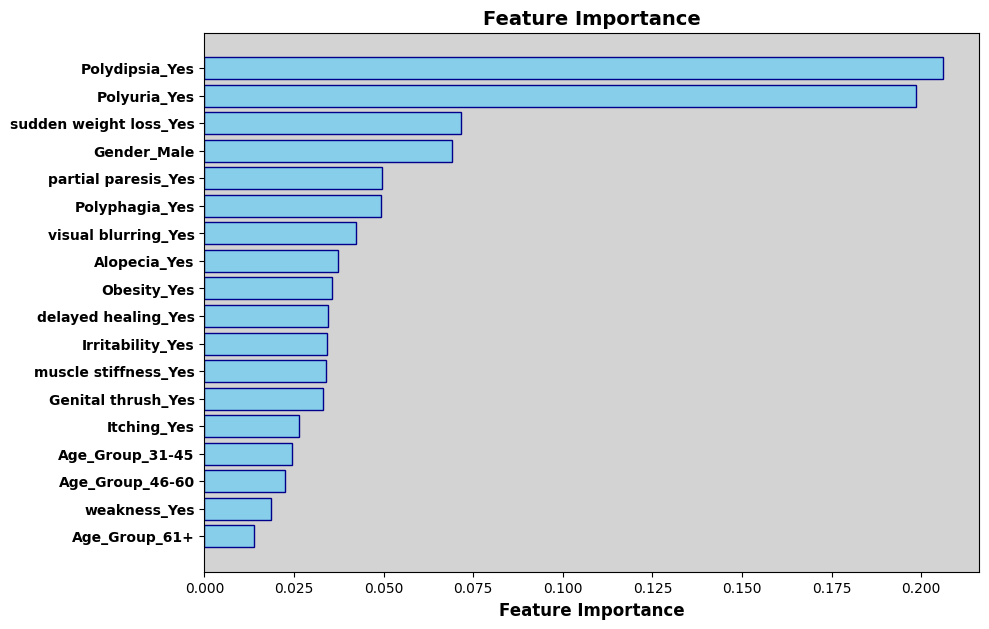

In [24]:
# Feature Importance

# Get the feature importance values and names
feature_importance = best_classifier.feature_importances_
feature_names = X_test_prep.columns

# Sort importances
sorted_idx = np.argsort(feature_importance)

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Create horizontal bar plot
bars = plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue', edgecolor='darkblue')

# Thickening the edges of horizontal bars
for bar in bars:
    bar.set_edgecolor('darkblue')

# Labels on the y-axis
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], fontsize=10, fontweight='bold', color='black')

# Labels and titles
plt.xlabel("Feature Importance", fontsize=12, fontweight='bold', color='black')
plt.title('Feature Importance', fontsize=14, fontweight='bold', color='black')

# Background color
plt.gca().set_facecolor('lightgrey')

plt.show()